## Math110A HW4
<p>Name: Tianhong Wang</p>
<p>UCIID:92807178</p>
<p>Date: 2022/3/12</p>

In [1]:
import numpy as np  # arrays
import matplotlib.pyplot as plt  # 2d plotting
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Question 1

In [2]:
def QObjFunc(x): # f
    return (100*(x[1]-x[0]**2)**2+(1-x[0])**2)
def QGradObjFunc(x): # gradient of f
    return np.array([-400*x[0]*x[1]+400*x[0]**3+2*x[0]-2,200*(x[1]-x[0]**2)])

In [3]:
def heavyBall(objFunc, gradObjFunc, x0, tol, maxIter):
    path = [x0]
    k = 0
    xk = x0 
    pk = -gradObjFunc(xk)
    # Compute the first step separately. 
    if norm(pk) < tol:
        return xk, 0, path
    else:
        k = k + 1
        xk = xk + alpha * pk 
        path.append(xk)
# The rest of iterations
    pk = -gradObjFunc(xk)

    while norm(pk) > tol and k <= maxIter: 
    # use path[-2] since path[-1] is the xk
        xk = xk + alpha * pk + beta * (xk - path[-2])
        pk = -gradObjFunc(xk)
        k = k + 1
        path.append(xk)
    path = np.array(path) # convert to array
    if norm(pk) <= tol:
        print("Found the minimizer at {x} with {iter} iterations successfully, gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
    else:
        print("Unable to locate minimizer within maximum iterations, last position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))
    return xk, k, path

In [4]:
d2f= lambda x,y: np.array([[-400*y+2+1200*x**2,-400*x],[-400*x,200]])

In [5]:
eigs, _ = np.linalg.eigh(d2f(1,1))
print(eigs)
print('alpha = ',4/(np.sqrt(eigs[0])+np.sqrt(eigs[1]))**2)
print('beta = ',(np.sqrt(eigs[1])-np.sqrt(eigs[0]))**2/(np.sqrt(eigs[1])+np.sqrt(eigs[0]))**2)

[3.99360767e-01 1.00160064e+03]
alpha =  0.0038387715930902127
beta =  0.9232245681381966


In [6]:
alpha=0.0035
beta=0.924
x_1, iter_1, path_1 = heavyBall(QObjFunc, QGradObjFunc,x0, tol, maxIter)

NameError: name 'x0' is not defined

In [ ]:
Npath=[]
for i in range(len(path_1)):
    Npath.append(np.linalg.norm(QGradObjFunc(path_1[i])))
plt.plot(np.log(Npath))
plt.title("the norm of gradient on log scale vs. iteration numbers")

## Question 2 Linear

In [7]:
data = np.loadtxt("CaCovidInfMarch24toMidJuly.txt").reshape(-1,1)
date = np.arange(1, len(data) + 1).reshape(-1,1)

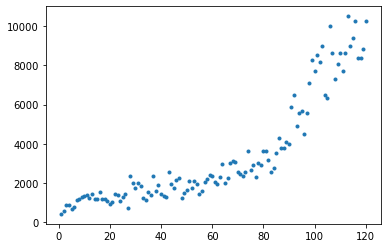

In [8]:
plt.plot(date,data,".")

### a) normal line

In [9]:
#training data
x_t=date[0:90]
y_t=data[0:90]
#validation data
x_val=date[90:120]
model = LinearRegression()
model.fit(x_t, y_t) 
model.intercept_, model.coef_

(array([613.31244327]), array([[30.17059661]]))

### b) full batch gradient descent;

In [10]:
def gradient_descent(X_b, y, n_iterations,sz, eta=4e-9):
    # n_iterations: total epochs
    # eta: fixed learning rate (step size)
    # X: for plotting purposes
    theta_path_bgd = []
    theta = np.random.randn(sz,1) #random start
    for iteration in range(n_iterations):
        gradients = X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path_bgd.append(theta)
    return theta_path_bgd, theta

In [11]:
X_b1 = np.c_[np.ones((90, 1)), x_t] # add x0 = 1 to each instance

In [12]:
theta_path_bgd1, theta1= gradient_descent(X_b1, y_t,300000,sz=2)
theta1

array([[18.76032746],
       [40.02593397]])

### c) mini-batch (size 10) stochastic gradient descent

In [13]:
def minibatch_gradient_descent(X_b, y, n_iterations, minibatch_size,sz, t0=500, t1=500):
    theta_path_mgd = []
    np.random.seed(42)
    m = len(X_b)
    theta = np.random.randn(sz,1) # random initialization
    def learning_schedule(t): # Learning rate
        return t0 / (t + t1)
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        # shuffle/randomize indices towards iid samples
        # to improve settling down towards convergence
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    return theta_path_mgd, theta

In [14]:
theta_path_mgd, theta1_m= minibatch_gradient_descent(X_b1, y_t,10000,10,sz=2, t0=10, t1=5000000)
theta1_m

array([[52.5641798 ],
       [39.45844027]])

### d) compute training and prediction mean square errors

#### normal line

In [15]:
np.sqrt(mean_squared_error(data, model.predict(date)))

2162.0575098036675

In [16]:
plt.plot(Xcovid,data,".")
plt.plot(x_t, model.predict(x_t), "r")
plt.plot(x_val, model.predict(x_val), "g")

NameError: name 'Xcovid' is not defined

#### full batch

In [17]:
np.sqrt(mean_squared_error(data,theta1[0] + theta1[1]*date))

1963.3351730066483

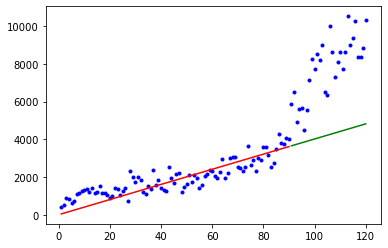

In [18]:
plt.plot(date, data, "b.")
plt.plot(x_t, theta1[0] + theta1[1]*x_t,"r")
plt.plot(x_val, theta1[0] + theta1[1]*x_val,"g")
plt.show()

### mini batch

In [19]:
np.sqrt(mean_squared_error(data,theta1_m[0] + theta1_m[1]*date))

1973.9384868253676

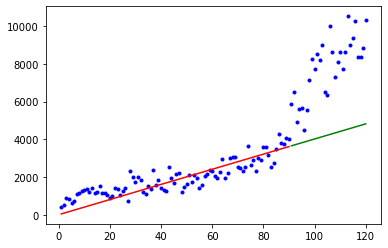

In [20]:
plt.plot(date, data, "b.")
plt.plot(x_t, theta1[0] + theta1[1]*x_t,"r")
plt.plot(x_val, theta1[0] + theta1[1]*x_val,"g")
plt.show()

## Q3 quadratic polynomial

### a) normal line

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(date)

In [22]:
x_t2=X_poly[0:90]
x_val2=X_poly[90:120]
model2= LinearRegression()
model2.fit(x_t2, y_t)
model2.intercept_, model2.coef_

(array([1001.09376488]), array([[4.88051042, 0.27791304]]))

## b) full batch

In [23]:
X_b2 = np.c_[np.ones((90, 1)), x_t2] # add x0 = 1 to each instance

In [24]:
theta_path_bgd2, theta2= gradient_descent(X_b2, y_t, 300000,sz=3,eta=3e-11)

In [25]:
print(theta2)

[[0.8227465 ]
 [6.60891413]
 [0.45761019]]


### c) mini batch

In [26]:
theta_path_mgd2, theta2_m= minibatch_gradient_descent(X_b2, y_t, 30000, 10, sz=3,t0=0.0001, t1=5e4)
theta2_m

array([[0.6704804 ],
       [2.89961118],
       [0.50883403]])

### d) compute training and prediction mean square errors

#### normal line

In [27]:
np.sqrt(mean_squared_error(data, model2.predict(X_poly)))

1741.6430953006652

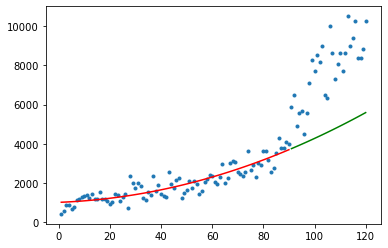

In [28]:
plt.plot(date,data,".")
plt.plot(x_t, model2.predict(x_t2), "r")
plt.plot(x_val, model2.predict(x_val2), "g")

#### full batch

In [29]:
np.sqrt(mean_squared_error(data,theta2[0] + theta2[1]*date+theta2[2]*date**2))

1307.9396762998845

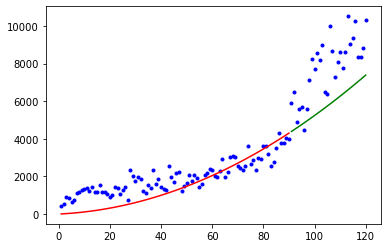

In [30]:
plt.plot(date, data, "b.")
FQ1=theta2[0] + theta2[1]*x_t+theta2[2]*x_t**2
FQ2=theta2[0] + theta2[1]*x_val+theta2[2]*x_val**2
plt.plot(x_t,FQ1,"r")
plt.plot(x_val,FQ2,"g")
plt.show()

### mini batch

In [31]:
np.sqrt(mean_squared_error(data,theta2_m[0] + theta2_m[1]*date+theta2_m[2]*date**2))

1253.2306352430776

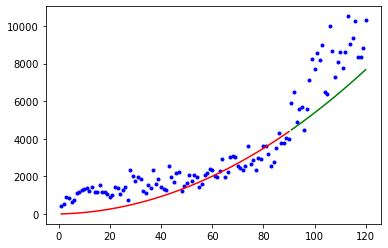

In [32]:
plt.plot(date, data, "b.")
MFQ1=theta2_m[0] + theta2_m[1]*x_t+theta2_m[2]*x_t**2
MFQ2=theta2_m[0] + theta2_m[1]*x_val+theta2_m[2]*x_val**2
plt.plot(x_t,MFQ1,"r")
plt.plot(x_val,MFQ2,"g")
plt.show()

## Q4 cubic polynomial

### a) normal line

In [33]:
poly_features2 = PolynomialFeatures(degree=3, include_bias=False)
X_poly2 = poly_features2.fit_transform(date)

In [34]:
x_t3=X_poly2[0:90]
x_val3=X_poly2[90:120]
model3= LinearRegression()
model3.fit(x_t3, y_t)
model3.intercept_, model3.coef_

(array([653.08781856]),
 array([[ 4.95422479e+01, -9.42304168e-01,  8.93932017e-03]]))

### b) full batch

In [35]:
X_b3 = np.c_[np.ones((90, 1)), x_t3] # add x0 = 1 to each instance

In [43]:
theta_path_bgd3, theta3= gradient_descent(X_b3, y_t,  10000,sz=4,eta=4e-14)
print(theta3)

[[7.28924299e-01]
 [1.77795903e+00]
 [4.92367052e-01]
 [1.49337707e-04]]


### mini batch

In [44]:
theta_path_mgd3, theta3_m= minibatch_gradient_descent(X_b3, y_t, 8000, 10, sz=4,t0=0.0000001, t1=5e5)
theta3_m

array([[ 0.49672411],
       [-0.13822395],
       [ 0.63480143],
       [-0.0013573 ]])

### d) compute training and prediction mean square errors

#### normal line

In [45]:
np.sqrt(mean_squared_error(data, model3.predict(X_poly2)))

1086.3586813992654

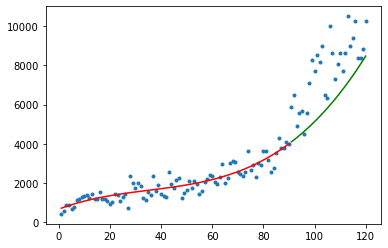

In [46]:
plt.plot(date,data,".")
plt.plot(x_t, model3.predict(x_t3), "r")
plt.plot(x_val, model3.predict(x_val3), "g")

#### full batch

In [47]:
np.sqrt(mean_squared_error(data,theta3[0]+theta3[1]*date+theta3[2]*date**2+theta3[3]*date**3))

1307.1163539073425

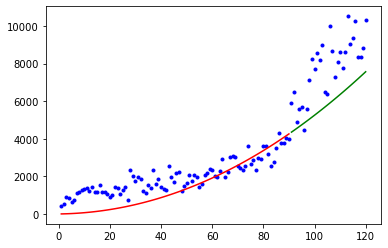

In [48]:
plt.plot(date, data, "b.")
FC3=theta3[0] + theta3[1]*x_t+theta3[2]*x_t**2+theta3[3]*x_t**3
FC4=theta3[0] + theta3[1]*x_val+theta3[2]*x_val**2+theta3[3]*x_val**3
plt.plot(x_t,FC3,"r")
plt.plot(x_val,FC4,"g")
plt.show()

### mini batch

In [49]:
np.sqrt(mean_squared_error(data,theta3_m[0]+theta3_m[1]*date+theta3_m[2]*date**2+theta3_m[3]*date**3))

1469.2924430864073

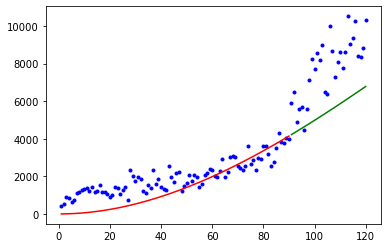

In [50]:
plt.plot(date, data, "b.")
MFC3=theta3_m[0] + theta3_m[1]*x_t+theta3_m[2]*x_t**2+theta3_m[3]*x_t**3
MFC4=theta3_m[0] + theta3_m[1]*x_val+theta3_m[2]*x_val**2+theta3_m[3]*x_val**3
plt.plot(x_t,MFC3,"r")
plt.plot(x_val,MFC4,"g")
plt.show()

## Question 5

From the data, it already shows it's not linear. 
Mini batch for 2nd and 3rd order methods are easy to overfitting. 
The full batch method is more easy to be over fitting, but from least equare error anaylsis, it didn't shows it's benefits.
The regression model looks a little bit under fitting. 
In my opinion, the best method is compute optimal solution by solving normal third order polynomial equation. It shows the best result. I also believe that with some modification, the minibatch can also shows its benefit in prediction. But it I didn't get a good premeter to satisfy this model. Thus I choose third order polynomial regression model.